### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importing Files

In [2]:
files=[i for i in os.listdir("D:DataSets/Sales_Data")]
for i in files:
    print(i)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


To check whether all files have same data or not. Since, number of files are less, hence we can visually by printing the shape and columns of every data file. 

In [3]:
data_columns=[]
for i in files:
    data=pd.read_csv("D:DataSets/Sales_Data" + "/" + i)
    print(set(data.columns))
    print(data.shape)

{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Address', 'Product'}
(18383, 6)
{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Address', 'Product'}
(12011, 6)
{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Address', 'Product'}
(25117, 6)
{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Address', 'Product'}
(12036, 6)
{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Address', 'Product'}
(9723, 6)
{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Address', 'Product'}
(14371, 6)
{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Address', 'Product'}
(13622, 6)
{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Address', 'Product'}
(15226, 6)
{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Address', 'Product'}
(16635, 6)
{'Quantity Ordered', 'Order Date', 'Order ID', 'Price Each', 'Purchase Add

Since, the number of columns and names of columns are same in all files, thus common file can be made which includes all the columns from the above lists. 

In [4]:
new_df=pd.DataFrame()

for i in files:
    new_file=pd.read_csv("D:DataSets/Sales_Data" + "/" + i)
    new_df=pd.concat([new_file,new_df])
new_df.shape    

(186850, 6)

Thus, current data that contains all the files have in total 1,86,850 rows and 6 columns. 

In [5]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09-01-2019 19:03,"125 5th St, Atlanta, GA 30301"


Here, 
1. Order ID is the ID of every product
2. Product is the name of the product 
3. Quantity Ordered is the number of quantities ordered
4. Price each is the price of product per quantity
5. Order Date is the date of which order has been placed
6. Purchase Address is the address where order has to be delivered

### Feature Engineering

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


Since, non null values are 1,86,305 whereas total values are 1,86,850 thus, there are some null values present

In [7]:
new_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Lets check the rows having missing values.

In [8]:
new_df[new_df.isna()==True].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


Since, null values are in every columns of these rows, hence, these rows can be dropped.

In [9]:
new_df.dropna(inplace=True)

In [10]:
new_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Thus, no null values are remaining in the data. 

In [11]:
new_df.shape #Since, the rows of missing values are deleted, the total rows has decreased

(186305, 6)

To describe the data.

In [12]:
new_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,18,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Since, here the unique counts of every column is given along with the mode of every column as in form of top. It also shows, that order date has value called "Order Date" and Purchase Address has value called "Purchase Address"

### Exploratory Analysis 

#### 1. To Find The Best Month of Sales

In [13]:
new_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Since, Order Date is having month in it but its data type is object. Hence, its reuired to convert it into datetime and extracting the month out of it. But its having  a value called "Order Date" so, 

In [14]:
new_df[new_df['Order Date']=='Order Date'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
new_df[new_df['Order Date']=='Order Date'].shape

(355, 6)

Since, these 355 values has same data which is not required hence we can drop these rows by applying negation over it.

In [16]:
filter=new_df['Order Date']=='Order Date'
new_df=new_df[~filter]
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09-01-2019 19:03,"125 5th St, Atlanta, GA 30301"


In [17]:
new_df.reset_index(drop=True, inplace=True)

To convert the order date to date time format 

In [18]:
new_df['Order Date']=pd.to_datetime(new_df['Order Date'])
new_df['Month']=new_df['Order Date'].dt.month

In [19]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9


To study the sales for this month, we need to convert the data into respective types.

In [20]:
new_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

Quantity Ordered, Month and Price Each has to converted to Integer 

In [21]:
new_df['Quantity Ordered']=new_df['Quantity Ordered'].astype(int)
new_df['Month']=new_df['Month'].astype(int)
new_df['Price Each']=new_df['Price Each'].astype(float)

In [22]:
new_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
dtype: object

Now, we need to add sales column over it. 

In [23]:
new_df['Sales']=new_df['Quantity Ordered']*new_df['Price Each']

In [24]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95


Now in order to perform best month for the sales, group by is applied

In [25]:
new_df.groupby('Month')['Sales'].sum() #Here, group by is shown wrt to months

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

Thus to study the best sales month, count plot or bar plot is best hence, 

Text(0.5, 1.0, 'Months vs Total Sales')

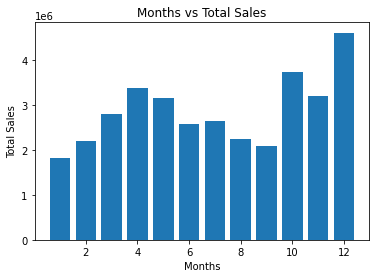

In [26]:
plt.bar(range(1,13),new_df.groupby('Month')['Sales'].sum())
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("Months vs Total Sales")

#### Thus, it is concluded from above plot that December has the Maximum Sales  of apprx 4.61e+06 and january has minimum sales of 1.82e+06
#### Thus, advertising in 10-12 month will increase the sales since this is the period of higher sales. 

Now to analyze the products having the maximum sales in December. 

In [27]:
new_df[new_df['Month']==12]['Product'].value_counts()

USB-C Charging Cable          2980
Lightning Charging Cable      2893
AAA Batteries (4-pack)        2831
AA Batteries (4-pack)         2721
Wired Headphones              2546
Apple Airpods Headphones      2056
Bose SoundSport Headphones    1807
27in FHD Monitor               959
iPhone                         906
27in 4K Gaming Monitor         863
34in Ultrawide Monitor         846
Google Phone                   714
Flatscreen TV                  663
Macbook Pro Laptop             643
20in Monitor                   567
ThinkPad Laptop                539
Vareebadd Phone                284
LG Dryer                        86
LG Washing Machine              80
Name: Product, dtype: int64

#### Thus, in December Month, Top 7 products have maximum sales and same as in month 10. 
#### Hence, advertising these 7 products in the specific months only will enhance the sales and save the cost of adverstising in rest of the months. 

#### 2. To Find The Best City Having Maximum Sales

Since, city column is not given hence we have to take new column named as city and extract city from address.

In [28]:
def city_name(x):
    return x.split(",")[1]

new_df['City']=new_df['Purchase Address'].apply(city_name)

In [29]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


Text(0.5, 1.0, 'Count of Cities')

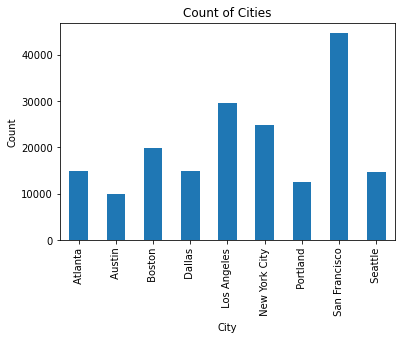

In [30]:
new_df.groupby('City')['City'].count().plot.bar()
plt.ylabel("Count")
plt.title("Count of Cities")

#### Thus, this plot shows that maximum orders have been placed by San francisco followed by Los Angeles and then New York city. 

#### But saying that San Francisco has maximum sales is may or may not correct. So, inorder to check that, 

Text(0.5, 1.0, 'Total Sales For Every City')

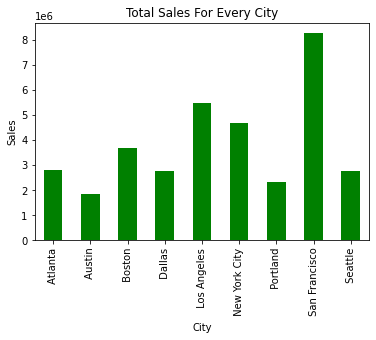

In [31]:
new_df.groupby('City')['Sales'].sum().plot.bar(color="g")
plt.ylabel("Sales")
plt.title("Total Sales For Every City")

#### Thus, San Francisco has maximum sales of apprx 8e+06 whereas Los Angeles has sales of 5.5e+06.
#### Thus, more advertisement can be done in San Francisco, Los Angeles, New york City and Boston to enhance the sales. 

#### 3. To Find Time Having Maximum Sales

In [32]:
new_df['Hour']=new_df['Order Date'].dt.hour
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


Text(0.5, 1.0, 'Hour vs Sales Plot')

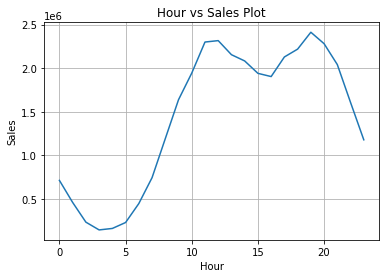

In [33]:
plt.plot(range(0,24),new_df.groupby('Hour')['Sales'].sum())
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.title("Hour vs Sales Plot")

#### Thus, its can be said that arounf 11 am-12 noon and 7 pm is best time for sales. 
#### The advertisement can be done in this period so that the sales will enhance more. 

#### 4. Maximum Sold Product

Thus in order to find maximum sold product, groupby is required.

In [34]:
new_df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

Text(0.5, 1.0, 'Quantity Sum vs Product Name')

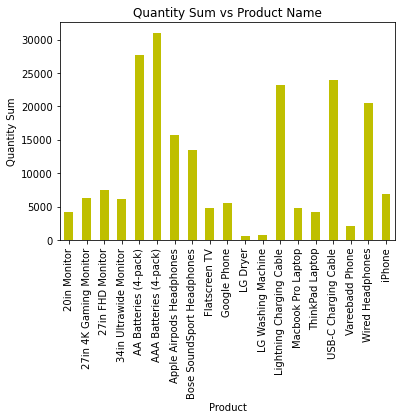

In [35]:
new_df.groupby('Product')['Quantity Ordered'].sum().plot.bar(color="y")
plt.ylabel("Quantity Sum")
plt.title("Quantity Sum vs Product Name")

#### Thus, AAA Batteries has the maximum sales but why ?

Text(0.5, 1.0, 'Price vs Product')

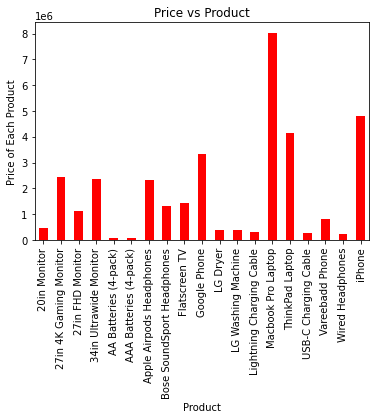

In [36]:
new_df.groupby('Product')['Price Each'].sum().plot.bar(color="r")
plt.ylabel("Price of Each Product")
plt.title("Price vs Product")

#### Here, its shown that AAA Batteries has the least prize thus, it can be the reason for maximum sles of it. 

Thus, to visualize them together, 

In [37]:
product=new_df.groupby('Product')['Quantity Ordered'].sum().index
quantity=new_df.groupby('Product')['Quantity Ordered'].sum()
price=new_df.groupby('Product')['Price Each'].sum()

Text(0.06, 0.5, 'Quantity')

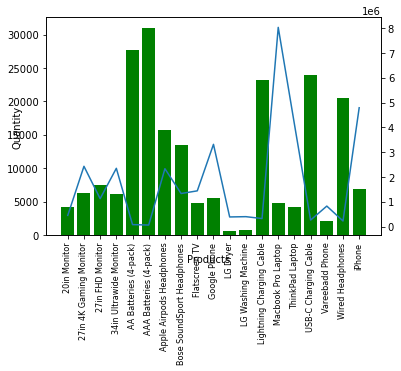

In [38]:
fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(product,quantity,color="g")
ax2.plot(product,price)
ax1.set_xticklabels(product,rotation='vertical', size=8)
fig.text(0.5, 0.04, 'Products', ha='center', va='center')
fig.text(0.06, 0.5, 'Quantity', ha='center', va='center', rotation='vertical')

#### Here, as shown quantity and price is inversely proposal, where price increases, the quantity purchased decreases. 
#### The cheaper the product, the higher the quantity ordered.

#### 5. What Products are Sold Together ?

Now, in order to find together sold products, in data, every order has same ine order ID, so the products order together will have the same order ID hence we can collect those repeated order ID.

In [39]:
new_df2=new_df[new_df['Order ID'].duplicated(keep=False)]
new_df2.head() #data with repeated order ID

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco,10
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.95,San Francisco,10
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles,12


In [40]:
new_df2['Grouped']=new_df2.groupby('Order ID')['Product'].transform(lambda x:",".join(x))

In [41]:
new_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15,"USB-C Charging Cable,USB-C Charging Cable"
21,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco,10,"iPhone,Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.95,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,14.95,San Francisco,10,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles,12,"Bose SoundSport Headphones,Google Phone"


Thus, here we get the grouped column that is, the products that were ordered together. 

In [42]:
new_df2=new_df2.drop_duplicates(subset=['Order ID'])
new_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
20,248171,USB-C Charging Cable,1,11.95,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",9,11.95,New York City,15,"USB-C Charging Cable,USB-C Charging Cable"
60,248210,iPhone,1,700.00,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",9,700.00,San Francisco,10,"iPhone,Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.99,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",9,99.99,Los Angeles,12,"Bose SoundSport Headphones,Google Phone"
117,248265,Vareebadd Phone,1,400.00,2019-09-24 14:07:00,"939 14th St, San Francisco, CA 94016",9,400.00,San Francisco,14,"Vareebadd Phone,Bose SoundSport Headphones"
176,248323,Google Phone,1,600.00,2019-09-30 20:36:00,"725 10th St, Portland, OR 97035",9,600.00,Portland,20,"Google Phone,Bose SoundSport Headphones"


Text(0.5, 1.0, 'Pie Chart for Grouped Products')

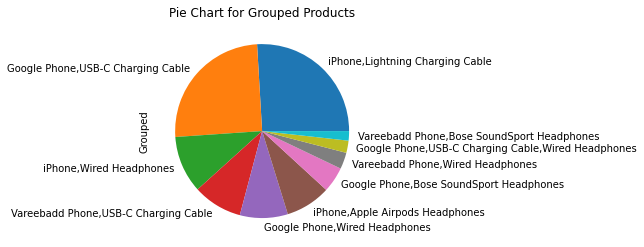

In [43]:
new_df2['Grouped'].value_counts()[:10].plot.pie()  #Plots of Counts of top 10 mostly sold grouped products 
plt.title("Pie Chart for Grouped Products")

#### Here, Maximum grouped products are IPhone with Lightening Charging Cable and Google Phone with USB-C Charging cable.
#### Thus, if any customer book IPhone, then e-commerse website can pop-up Lightening Charging Cable 